## MoMa Art Gallery Analysis

#### The dataset is sourced from MavenAnalytics. This research dataset contains 157,630 records, representing all of the works that have been accessioned into MoMA’s collection and cataloged in their database. It includes basic metadata for each work, including title, artist, date made, medium, dimensions, and date acquired by the Museum.

In [2]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import re
import unicodedata
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import nltk 
from nltk.corpus import stopwords 
from collections import Counter
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from textblob import TextBlob

In [3]:
#Reading artworks file
artworks = pd.read_csv(r"C:\Users\parij\Downloads\MoMA+Art+Collection\Artworks.csv")
df = pd.DataFrame(artworks)

### Data Exploration

In [4]:
df.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,OnView,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(male),1896,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(male),1987,Paint and colored pencil on print,...,NaN,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(male),1980,Photographic reproduction with colored synthet...,...,NaN,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [5]:
df.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ImageURL', 'OnView',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')

In [6]:
df.shape

(157630, 30)

In [7]:
df.size

4728900

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157630 entries, 0 to 157629
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               157582 non-null  object 
 1   Artist              156361 non-null  object 
 2   ConstituentID       156361 non-null  object 
 3   ArtistBio           151542 non-null  object 
 4   Nationality         156361 non-null  object 
 5   BeginDate           156361 non-null  object 
 6   EndDate             156361 non-null  object 
 7   Gender              156361 non-null  object 
 8   Date                155611 non-null  object 
 9   Medium              148383 non-null  object 
 10  Dimensions          148971 non-null  object 
 11  CreditLine          156080 non-null  object 
 12  AccessionNumber     157630 non-null  object 
 13  Classification      157630 non-null  object 
 14  Department          157630 non-null  object 
 15  DateAcquired        150881 non-nul

In [9]:
df.describe()

,ObjectID,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
count,157630.000000,10.000000,18046.000000,1469.000000,128219.000000,725.000000,296.000000,127293.000000,0.0,1.953000e+03
mean,142399.312479,44.868020,14.834694,23.284665,37.730404,91.117278,1273.685497,39.857926,NaN,6.067506e+03
std,141984.683404,28.631604,53.120118,44.843361,49.467999,333.146149,11894.756431,92.747175,NaN,1.432951e+05
min,2.000000,9.900000,0.000000,0.635000,0.000000,0.000000,0.090000,0.000000,NaN,0.000000e+00
25%,41896.250000,23.500000,0.000000,7.900000,18.000000,15.900000,6.092700,17.500000,NaN,1.200000e+02
50%,85667.500000,36.000000,0.000000,13.800000,27.800000,27.000000,23.360200,25.400000,NaN,4.200000e+02
75%,182409.750000,71.125000,5.800000,25.000000,44.000000,86.360200,100.698500,44.132600,NaN,1.500000e+03
max,488552.000000,83.800000,1808.483617,914.400000,9140.000000,8321.056600,185067.585957,9144.000000,NaN,6.283065e+06


In [12]:
df.isna().sum()

Title                     48
Artist                  1269
ConstituentID           1269
ArtistBio               6088
Nationality             1269
BeginDate               1269
EndDate                 1269
Gender                  1269
Date                    2019
Medium                  9247
Dimensions              8659
CreditLine              1550
AccessionNumber            0
Classification             0
Department                 0
DateAcquired            6749
Cataloged                  0
ObjectID                   0
URL                    57399
ImageURL               66587
OnView                156420
Circumference (cm)    157620
Depth (cm)            139584
Diameter (cm)         156161
Height (cm)            29411
Length (cm)           156905
Weight (kg)           157334
Width (cm)             30337
Seat Height (cm)      157630
Duration (sec.)       155677
dtype: int64

### Data Cleaning

In [13]:
# Removing Null Constituent IDs from the DataFrame
artworks.dropna(subset=['ConstituentID'],inplace=True)

In [14]:
# Cleaning the data by removing special and printable characters
def clean_text(text):
    if isinstance(text, str):  # Check if the value is a string
        text = text.strip()  # Remove leading and trailing spaces
        text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
        text = text.replace("\n", " ").replace("\r", " ")  # Remove line breaks
        text = re.sub(r'[^\x20-\x7E]', '', text) # Keep only printable ASCII characters (removing hidden characters)
    return text

# Apply cleaning to all text columns
artworks = artworks.map(clean_text)

In [15]:
# Converting non-ASCII to ASCII 
def remove_unicode(text):
    if isinstance(text, str):
        return unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode()
    return text

artworks = artworks.map(remove_unicode)


In [16]:
# Making a copy of the dataframe and dropping unused large text columns
artworks_copy = artworks.copy()
artworks_copy.drop(columns = ['ImageURL','URL', 'Seat Height (cm)'],inplace=True)

In [17]:
# Dropping rows that has multiple artists for one artwork
artworks_copy.drop(artworks_copy[artworks_copy['ConstituentID'].str.contains(',',na=False)].index,inplace = True)

# Converting date to datetime datatype
artworks_copy['DateAcquired'] = pd.to_datetime(artworks_copy['DateAcquired'])

In [18]:
# Removing parenthesis from specific columns
artworks_copy[['Nationality','BeginDate','EndDate','Gender']] = artworks_copy[['Nationality','BeginDate','EndDate','Gender']].apply(lambda x: x.str.replace(r'\(|\)','',regex=True))

In [9]:
# Removing the duplicates
artworks_copy = artworks_copy.drop_duplicates(subset=['Title','ArtistBio','Gender','Date','Height (cm)','Width (cm)'])

### Artist and Artwork insights

In [19]:
# Nationality Insights
nationality_count = artworks_copy['Nationality'].value_counts()
nationality_count_df = nationality_count.reset_index()
nationality_count_df.columns = ['Nationality','Total_Artworks']
print ('- The top 5 nationalities with most artworks are :\n', nationality_count_df.iloc[:6],'\n with total of', nationality_count_df.loc[4]['Total_Artworks'],'artworks of unknown nationality\n')

- The top 5 nationalities with most artworks are :
   Nationality  Total_Artworks
0    American           73576
1      French           22882
2      German            9637
3     British            5694
4                        5216
5     Spanish            3157 
 with total of 5216 artworks of unknown nationality



In [24]:
# Classification Insights
classification_count = artworks_copy['Classification'].value_counts()
classification_count_df = classification_count.reset_index()
classification_count_df.columns = ['Classification','Total_Artworks']
print ('The top 5 types of artworks that are popular: \n', classification_count_df.iloc[:5])

The top 5 types of artworks that are popular: 
               Classification  Total_Artworks
0                 Photograph           32898
1                      Print           31612
2           Illustrated Book           26892
3  Mies van der Rohe Archive           16266
4                    Drawing           13915


In [25]:
# Most featured artist in the musuem
art_count = artworks_copy.groupby('Artist')['ConstituentID'].count().sort_values(ascending=False)
art_count = art_count.reset_index()
art_count.columns = ['Artist','Total_Artworks']
print ('The most featured artist in the musuem is:', art_count.iloc[0]['Artist'], 'with', art_count.iloc[0]['Total_Artworks'], 'artworks')

The most featured artist in the musuem is: Ludwig Mies van der Rohe with 15491 artworks


#### What is the gender distribution over time?

In [30]:
gender_dist = artworks_copy.groupby('year')['Gender'].value_counts()
gender_dist

year  Gender           
1929  male                   9
1930  male                   7
1931  male                   3
1932  male                  16
      female                 1
                          ... 
2023  transgender woman      1
2024  male                 516
      female               228
      female transwoman     62
                            16
Name: count, Length: 287, dtype: int64

In [31]:
# Converting panda multiIndex series to DataFrame for easier plotting
gender_dist_unpack = gender_dist.unstack()
gender_dist_unpack.drop(columns = [''],inplace=True) # Removing empty gender values
gender_dist_unpack.head()

Gender,female,female transwoman,gender non-conforming,male,non-binary,transgender woman
year,,,,,,
1929,NaN,NaN,NaN,9.0,NaN,NaN
1930,NaN,NaN,NaN,7.0,NaN,NaN
1931,NaN,NaN,NaN,3.0,NaN,NaN
1932,1.0,NaN,NaN,16.0,NaN,NaN
1933,NaN,NaN,NaN,93.0,NaN,NaN


In [79]:
# Gender Insights 
gender_count = artworks_copy['Gender'].value_counts()
gender_count_df = gender_count.reset_index()
gender_count_df.columns = ['Gender','Total_Artworks']
print ('The top gender with most artworks are', gender_count_df.loc[0]['Gender'], 'with', gender_count_df.loc[0]['Total_Artworks'], 'total artworks.')

The top gender with most artworks are male with 121010 total artworks.


In [80]:
# Sum of all individual column values (excluding the index)
sum_of_all_columns = gender_dist_unpack[['male', 'female', 'female transwoman', 'non-binary', 'transgender woman']].sum().sum()

# Sum of individual columns' values
sum_of_individual_columns = gender_dist_unpack['male'] + gender_dist_unpack['female'] + gender_dist_unpack['female transwoman'] + gender_dist_unpack['non-binary'] + gender_dist_unpack['transgender woman']

# The desired result
male = round(((gender_dist_unpack['male']/sum_of_all_columns).sum())*100,2)
female = round(((gender_dist_unpack['female']/sum_of_all_columns).sum())*100,2)
female_trans = round(((gender_dist_unpack['female transwoman']/sum_of_all_columns).sum())*100,2)
non_binary = round(((gender_dist_unpack['non-binary']/sum_of_all_columns).sum())*100,2)
transgender_woman = round(((gender_dist_unpack['transgender woman']/sum_of_all_columns).sum())*100,2)

print (f'The percentage of Gender distribution for the artists is as follows : \n- Male : {male}%\n- Female : {female}% \n- Female transwoman : {female_trans}% \n- Non Binary : {non_binary}% \n- Transgender Woman : {transgender_woman}%')

The percentage of Gender distribution for the artists is as follows : 
- Male : 86.3%
- Female : 13.65% 
- Female transwoman : 0.05% 
- Non Binary : 0.01% 
- Transgender Woman : 0.0%


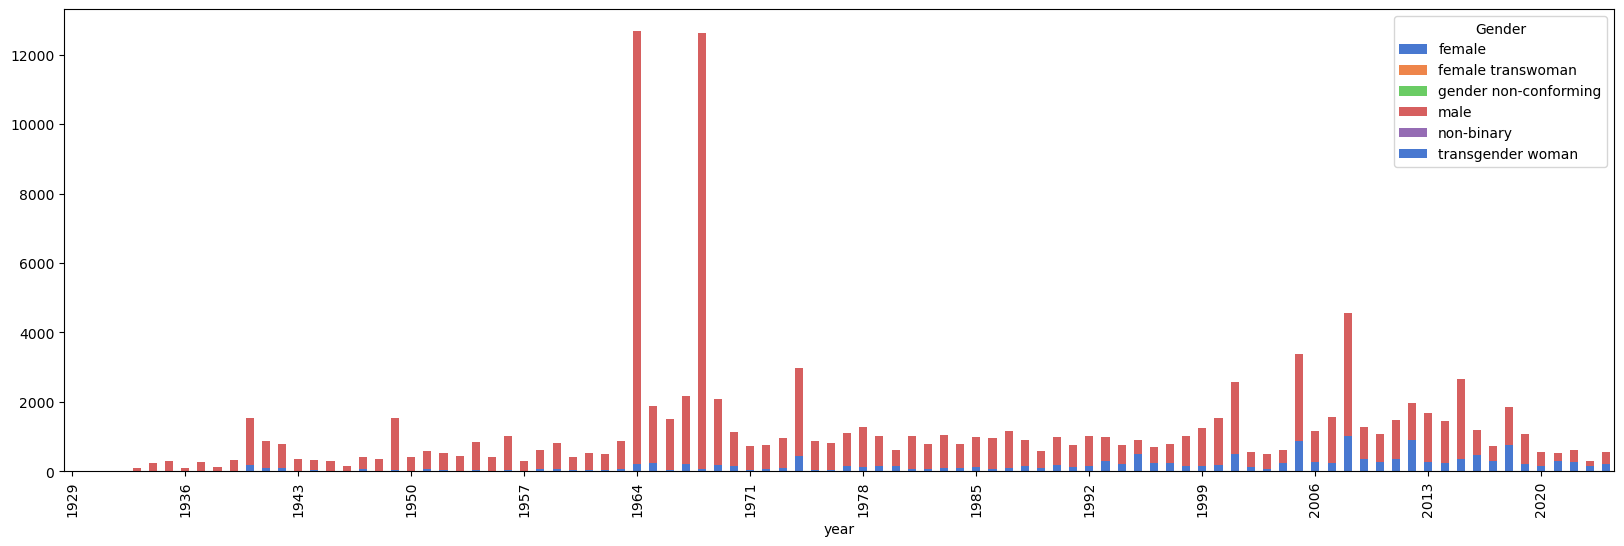

In [15]:
# Visualising the yearly Gender Representation of Artists
colors = sns.color_palette("muted", n_colors=len(gender_dist_unpack.columns)-1)
gender_dist_unpack.plot(kind='bar',stacked=True,figsize=(20,6),color= colors)
plt.locator_params(axis='x',nbins=15)
plt.show()

#### Which departments acquire the most artworks over time?

In [70]:
dept_art =  artworks_copy.groupby('Department').size().sort_values(ascending = False)
dept_art

Department
Drawings & Prints                        77263
Photography                              32095
Architecture & Design                    30693
Painting & Sculpture                      4037
Media and Performance                     2746
Fluxus Collection                         1188
Film                                       397
Architecture & Design - Image Archive       26
dtype: int64

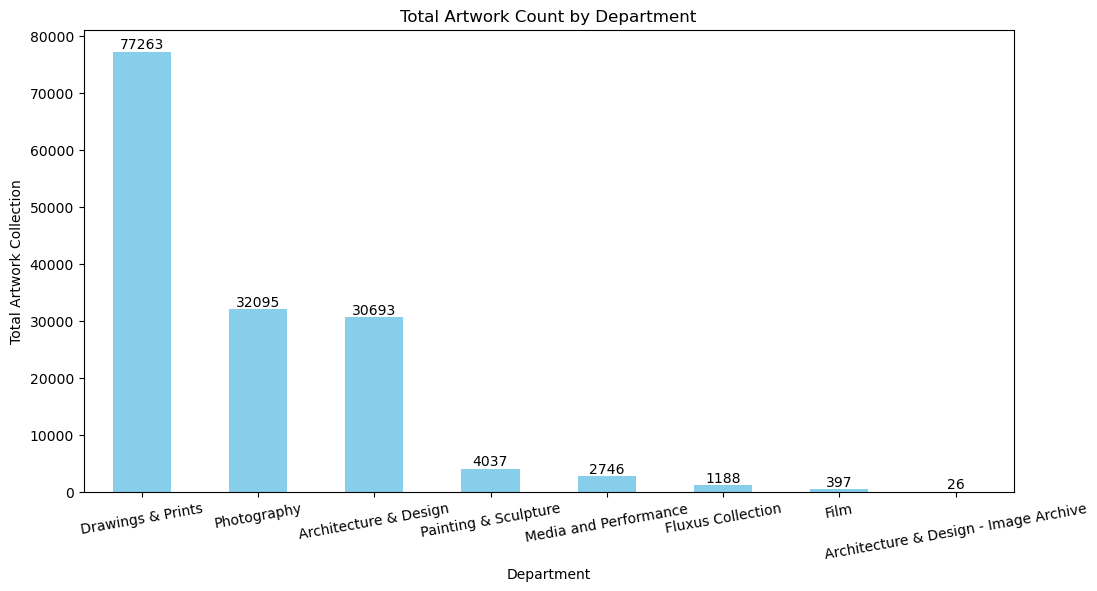

In [74]:
# Visualising the department artwork acquisition count
ax = dept_art.plot(kind='bar',x='Department',y='Total_Artworks',figsize=(12,6),color='skyblue')
for p in ax.patches:
    # Get the height of each bar (the artwork count)
    height = p.get_height()
    # Get the x-position of the bar (center of the bar)
    x_position = p.get_x() + p.get_width() / 2  
    # Place the text slightly above the bar
    ax.text(x_position, height + 2, str(height), ha='center', va='bottom', fontsize=10, color='black')
plt.tick_params(axis='x', rotation=10)
plt.xlabel('Department')
plt.ylabel('Total Artwork Collection')
plt.title('Total Artwork Count by Department')
plt.show()

#### What are the most commonly used mediums? (Used NLP) 

In [75]:
# 5. Text Cleaning Function
pd.set_option('display.max_rows', 5)
def clean_text(text):
    if not isinstance(text, str):  # Check if text is not a string
        return ""
    text = text.lower() #convert to lower case
    text = re.sub(r'\W+',' ',text) # removing special characters
    cleaned_words = []

    for word in text.split():      
       if word not in stopwords.words('english'):
          cleaned_words.append(word) #removing words like(eg: is,and,the,etc)
           
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text

artworks_copy['cleaned_text'] = artworks_copy['Medium'].apply(clean_text) # Calling the function using the dataset

In [76]:
# 6. Tokenization, i.e converting each string into list of words
artworks_copy["Tokens"] = artworks_copy["cleaned_text"].apply(word_tokenize)

In [77]:
# 7. Word Frequency Analysis
#For all the words in each list, those words are converted to indivdual items and its frequency is known using the 'Counter' class imported from the Collections module
all_words = []
for tokens in artworks_copy['Tokens']:
    for word in tokens:
        all_words.append(word)
word_freq = Counter(all_words)
freq_word_df = pd.DataFrame(word_freq.items(),columns = ['word','count'])

In [78]:
pd.set_option('display.max_rows', 5)
freq_word_df.sort_values(by='count', ascending=False, inplace=True)
freq_word_df 

,word,count
5,paper,34202
9,print,32232
...,...,...
3650,fingernail,1
6078,scaffolds,1


In [24]:
# Filtering out non-medium words
freq_word_df_filter = freq_word_df.set_index('word',inplace=False)
freq_word_df_filter = freq_word_df_filter.drop(['one','offset','two','including'],axis=0)
freq_word_df_filter_reset = freq_word_df_filter.reset_index()
freq_word_df_filter_reset.sort_values(by='count', ascending=False, inplace=True)

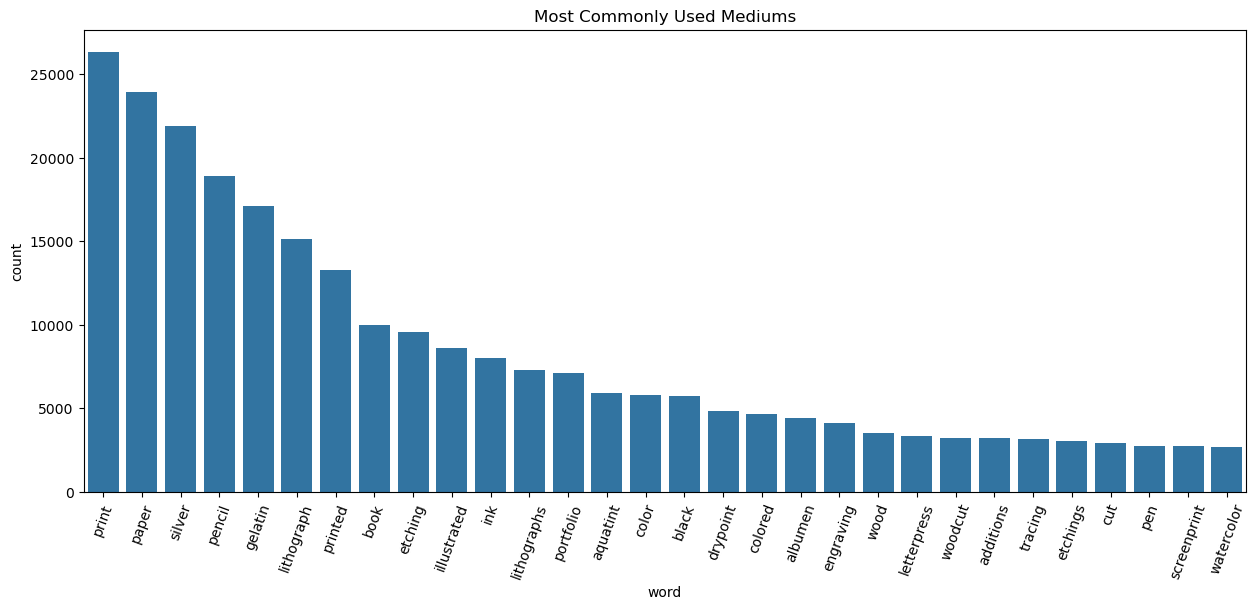

In [25]:
# 8. Word Frequency Visualization
plt.figure(figsize = (15,6))
sns.barplot(x=freq_word_df_filter_reset['word'][:30],y=freq_word_df_filter_reset['count'][:30])
plt.title('Most Commonly Used Mediums')
plt.xticks(rotation=70)
plt.show()

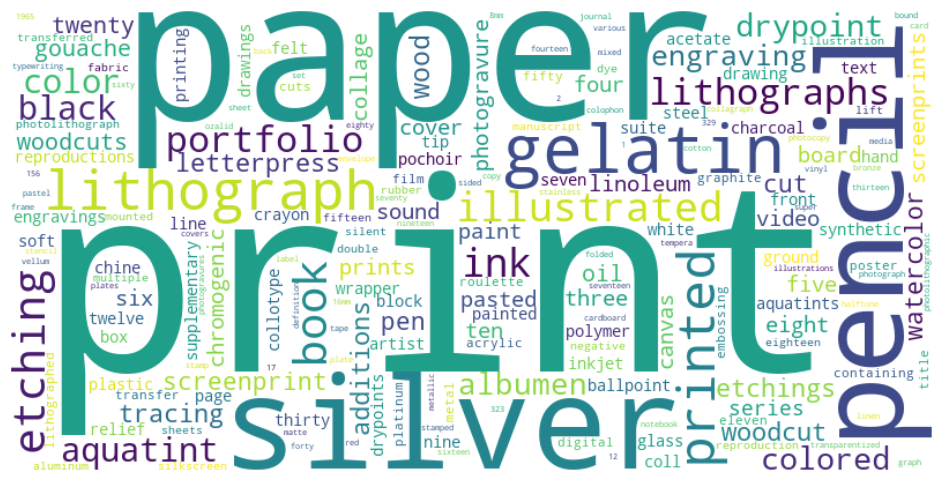

In [26]:
# Wordcloud Visualisation

# Converting DataFrame to a frequency dictionary
word_freq_dict = dict(zip(freq_word_df_filter_reset['word'], freq_word_df_filter_reset['count']))

# Generating word cloud using word frequencies
wordcloud = WordCloud(
    width=800, 
    height=400, 
    max_words=200, 
    background_color='white'
).generate_from_frequencies(word_freq_dict)

# Displaying the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


####  What is the average lifespan of artists based on their birth and death years?

In [81]:
artworks_copy['life_span'] = artworks_copy['EndDate'].astype(int)-artworks_copy['BeginDate'].astype(int)
filtered_df = artworks_copy.loc[(artworks_copy['life_span'] > 0) & (artworks_copy['life_span'] < 150)]

In [85]:
filtered_df['life_span'].mean()

77.97563733946713

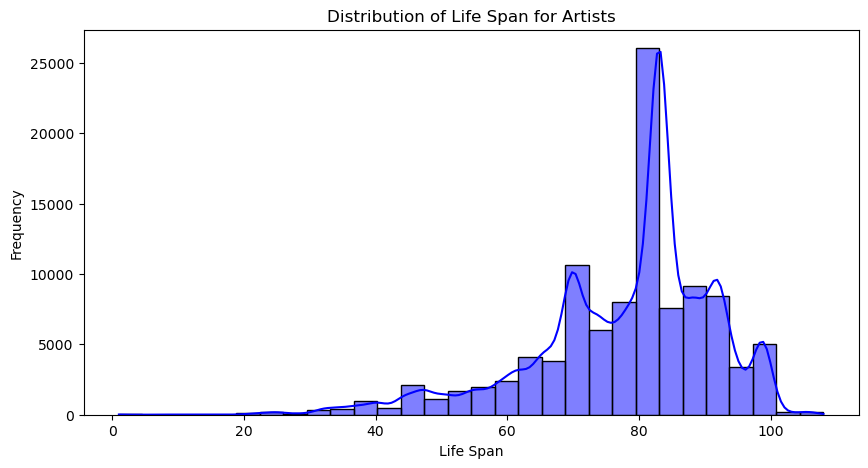

In [87]:
plt.figure(figsize=(10, 5))
sns.histplot(filtered_df['life_span'], bins=30, kde=True, color='blue')

plt.xlabel("Life Span")
plt.ylabel("Frequency")
plt.title("Distribution of Life Span for Artists")
plt.show()

#### What size of artworks more likely to be "On View" in the museum?

In [88]:
# Sampling subset of dataframe using only the dimensions and onview status for the artworks
hW_view = artworks_copy[['OnView','Circumference (cm)','Depth (cm)','Height (cm)','Length (cm)','Width (cm)']]
hW_view = hW_view.copy()
hW_view

,OnView,Circumference (cm),Depth (cm),Height (cm),Length (cm),Width (cm)
0,NaN,NaN,NaN,48.600000,NaN,168.900000
1,NaN,NaN,NaN,40.640100,NaN,29.845100
...,...,...,...,...,...,...
157628,NaN,NaN,NaN,96.520193,NaN,73.660147
157629,NaN,NaN,NaN,96.520193,NaN,73.660147


In [89]:
# Setting onview status as 1 artwork is displayed else 0
hW_view['test'] = np.where(hW_view['OnView'].isna(),0,1)

# Filter only the displayed artworks
displayed_artworks = hW_view[hW_view['test'] == 1]

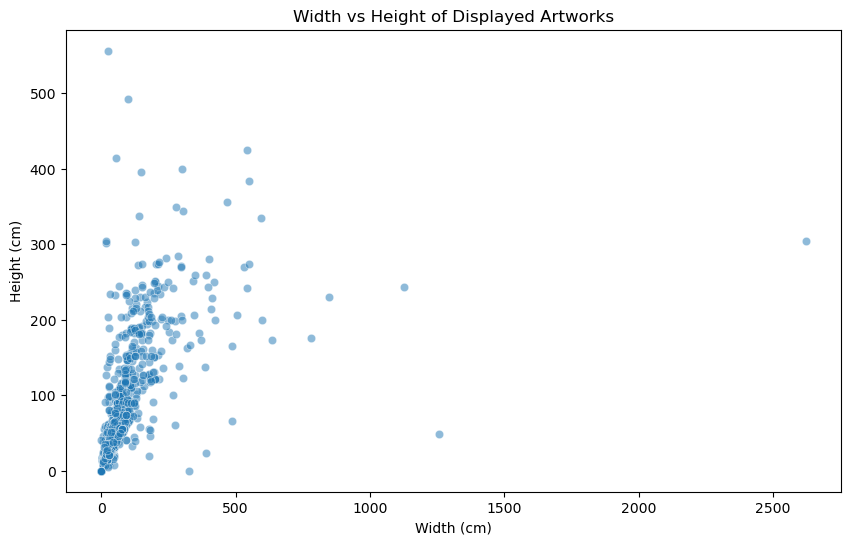

In [90]:
# Visualising Width vs Height of displayed artworks 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=displayed_artworks['Width (cm)'], y=displayed_artworks['Height (cm)'], alpha=0.5)
plt.title("Width vs Height of Displayed Artworks")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.show()

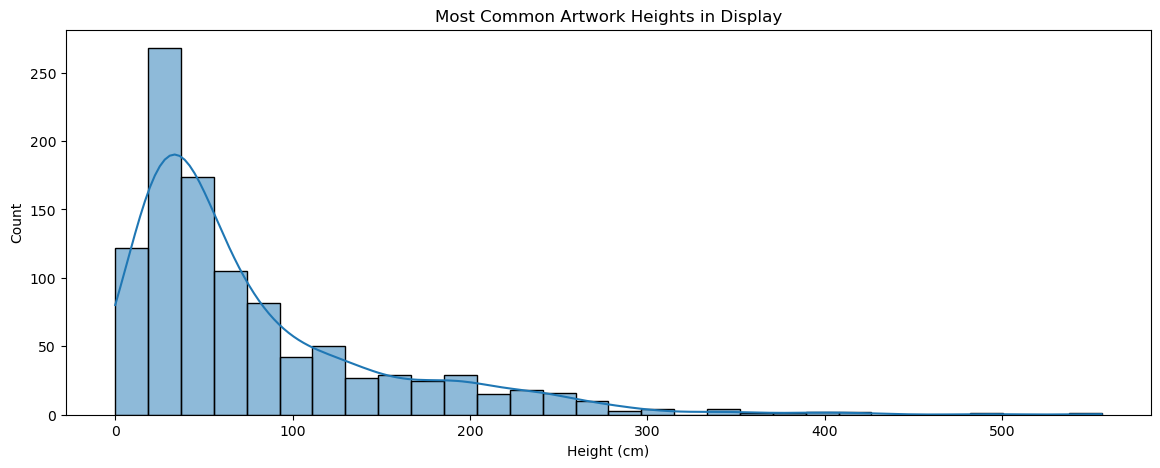

In [89]:
# Visualising Most Common Artwork Heights in Display
plt.figure(figsize=(14, 5))
sns.histplot(displayed_artworks['Height (cm)'], bins=30, kde=True)
plt.title("Most Common Artwork Heights in Display")
plt.xlabel("Height (cm)")
plt.show()

In [ ]:
# Converting data to excel file to create interactive dashboard in Tableau
artworks_copy.to_excel('Artworks_Copy.xlsx')

In [92]:
print("\nKey Findings:")
print("- American artists contribute the largest share of artworks in the museum's collection.")
print("- Male artists dominate the museum's collection, comprising 86.3% of the total artists, with a collective count of 121,010 artworks.")
print("- Drawings and prints are the most frequently acquired types of artworks in the museum.")
print("- The most commonly used mediums by the artists include prints, paper, pencil, and gelatin.")
print("- On average, the artists in the collection have a lifespan of 77 years (based on data from 1929 to 2024).")
print("- The majority of artworks displayed fall within the size range of 20-40cm cm in height.")


Key Findings:
- American artists contribute the largest share of artworks in the museum's collection.
- Male artists dominate the museum's collection, comprising 86.3% of the total artists, with a collective count of 121,010 artworks.
- Drawings and prints are the most frequently acquired types of artworks in the museum.
- The most commonly used mediums by the artists include prints, paper, pencil, and gelatin.
- On average, the artists in the collection have a lifespan of 77 years (based on data from 1929 to 2024).
- The majority of artworks displayed fall within the size range of 20-40cm cm in height.
